```
Task   : Machine Learning for Turbulent Fluid Dynamics
Author : Aditya Ahuja 
```

# Task 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as LA

In [2]:
def Get_Symmetric_Matrix(dim, low_lim, high_lim):    
    ''' Get a symmetric matrix of dimension (dim, dim)
        whose elements have been uniformly samples
        from betweem [low_lim, high_lim].
    '''
    
    A = np.random.uniform(low_lim, high_lim, size=[dim,dim])
    M = (A + A.T) / 2
    return M

A = Get_Symmetric_Matrix(10, low_lim=-1, high_lim=1)
print(A[:5,:5])

[[ 0.21786793 -0.16702052  0.17268118 -0.29594768  0.31872855]
 [-0.16702052 -0.36676806 -0.47793931  0.37553128 -0.05681074]
 [ 0.17268118 -0.47793931  0.35524143  0.33455357 -0.4231842 ]
 [-0.29594768  0.37553128  0.33455357 -0.3966817   0.1448069 ]
 [ 0.31872855 -0.05681074 -0.4231842   0.1448069  -0.29635518]]


# Task 2

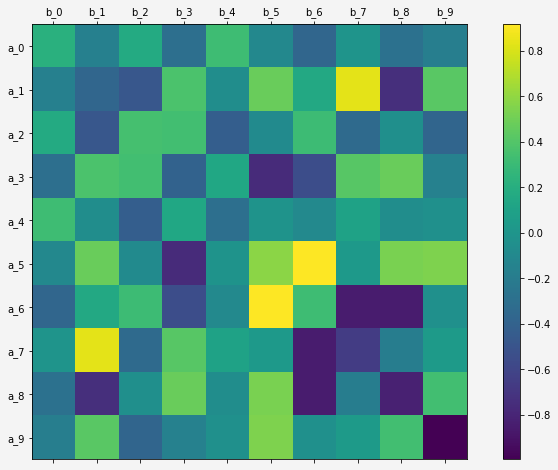

In [3]:
def plot_matrix(matrix, figsize=[13,8]):
    ''' Plot a Matrix visually.
    '''
    
    fig = plt.figure(figsize=figsize, facecolor='#F4F4F4')
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax, shrink=1, aspect=25, ticks=np.arange(-1,1,0.2))

    ax.set_yticks(range(matrix.shape[0]))
    ax.set_yticklabels([f'a_{i}' for i in range(matrix.shape[0])])
    ax.set_xticks(range(matrix.shape[1]))
    ax.set_xticklabels([f'b_{i}' for i in range(matrix.shape[1])])
    plt.show()
    
plot_matrix(A, figsize=[13,8])

# Task 3

In [4]:
def is_symmetric(M):
    ''' Check if Matrix M is symmetric
    '''
    return np.allclose(M-M.T,0)

In [5]:
def get_eigen(matrix):
    '''
        We use `scipy.linalg.eigh` (instead of `scipy.linalg.eig`)
        as it is assumed that the input matrix is symmetric, and
        the former is optimised for symmetric matrices.
    '''

    assert is_symmetric(matrix), 'Matrix should be Symmetric'
    e_vals, e_vecs = LA.eigh(A)
    
    # Sort by largest absolute value
    abs_vals = np.abs(e_vals)
    abs_vals, e_vals, e_vecs = zip(*sorted(zip(abs_vals, e_vals, e_vecs.T), reverse=True))
    e_vals = np.array(e_vals)
    e_vecs = np.array(e_vecs).T
    
    return e_vals, e_vecs

# Get the eigenvalues and eigenvectors
e_vals, e_vecs = get_eigen(A)

In [6]:
def verify_eigen(M, e_vals, e_vecs):
    ''' Given a matrix M and its eigenvalues / eigenvectors,
        verify their integrity.
    '''
    for i in range(len(e_vals)):
        e_val = e_vals[i]
        e_vec = e_vecs[:,i]
        assert np.allclose(np.matmul(M, e_vec), e_val*e_vec), \
            '{:.4f} is not an eigenvalue'.format(e_val)
    print('All Eigenvalues and Eigenvectors verified.')

# Verify the obtained eigenvalues and eigenvectors
verify_eigen(A, e_vals, e_vecs)

All Eigenvalues and Eigenvectors verified.


In [7]:
# Print the eigenvalues and eigenvectors

n = len(e_vals)

for i in range(n):
    print('Eigenvalue : {:.3f}'.format(e_vals[i]))
    template_eVec = 'Eigenvector: [' + ', '.join(['{:.2f}']*n) + ']\n'
    print(template_eVec.format(*e_vecs[:,i]))

Eigenvalue : -2.293
Eigenvector: [0.06, 0.39, 0.08, -0.36, 0.07, -0.34, 0.28, 0.14, 0.67, -0.17]

Eigenvalue : 2.069
Eigenvector: [0.11, -0.10, -0.01, 0.37, 0.08, -0.61, -0.63, 0.21, 0.12, -0.12]

Eigenvalue : -1.787
Eigenvector: [-0.10, 0.50, 0.05, -0.10, 0.07, 0.13, -0.43, -0.64, -0.05, -0.34]

Eigenvalue : 1.401
Eigenvector: [0.14, -0.48, 0.60, -0.06, -0.14, -0.28, 0.22, -0.41, -0.03, -0.26]

Eigenvalue : -1.268
Eigenvector: [0.17, -0.09, -0.36, 0.36, -0.28, 0.23, 0.19, 0.07, 0.15, -0.71]

Eigenvalue : -1.061
Eigenvector: [-0.36, -0.20, 0.19, -0.46, 0.20, 0.16, -0.23, 0.46, -0.18, -0.47]

Eigenvalue : 0.616
Eigenvector: [0.67, 0.13, -0.21, -0.28, 0.31, -0.20, 0.13, 0.04, -0.49, -0.15]

Eigenvalue : 0.534
Eigenvector: [-0.37, 0.46, 0.19, 0.29, -0.19, -0.35, 0.33, 0.17, -0.47, -0.13]

Eigenvalue : -0.372
Eigenvector: [-0.09, -0.02, 0.15, 0.43, 0.83, 0.13, 0.23, -0.05, 0.11, -0.08]

Eigenvalue : 0.108
Eigenvector: [-0.45, -0.29, -0.60, -0.18, 0.15, -0.40, 0.17, -0.32, -0.04, -0.04]



# Task 4

In [8]:
def approximate_matrix(e_vals, e_vecs, n_eigen=2):
    ''' Approximates the Matrix M by
            M = U * S * U'           
                            [* is matrix multiplication]
        where
            - M
            - M (d,d) is the reconstructed matrix
            - U (d, n_eigen) contains the eigenvectors.
            - S (n_eigen, n_eigen) is a diagonal matrix 
                containing the eigenvalues.
            - U' (n_eigen, d) is U transpose.
    '''
    
    U = e_vecs[:,:n_eigen]
    S = np.diag(e_vals[:n_eigen])
    M = np.matmul(U, np.matmul(S, U.T))
    return M

In [9]:
# Get a Symmetric Matrix
A = Get_Symmetric_Matrix(10, low_lim=-1, high_lim=1)

# Calculate and sort the eigenvalues and eigenvectors
e_vals, e_vecs = get_eigen(A)
e_vals = e_vals[::-1]
e_vecs = e_vecs.T[::-1].T

# Approximate A by M
M = approximate_matrix(e_vals, e_vecs, n_eigen=2)
M

array([[ 1.78325211e-02, -1.76730630e-02,  5.43805270e-03,
        -5.56711418e-03, -7.03585986e-03, -1.21867579e-02,
         3.70086317e-02, -3.23220811e-02,  8.59116813e-04,
        -2.66321347e-02],
       [-1.76730630e-02, -7.81611811e-02, -1.76734969e-02,
        -3.57259127e-02, -3.10095657e-02, -2.13802559e-02,
         5.94924914e-03,  7.17572638e-02,  4.65872382e-02,
         3.00775821e-02],
       [ 5.43805270e-03, -1.76734969e-02,  8.11640537e-05,
        -6.99300693e-03, -7.02225038e-03, -8.01211769e-03,
         1.67587992e-02, -4.75638987e-03,  6.35274039e-03,
        -7.64856330e-03],
       [-5.56711418e-03, -3.57259127e-02, -6.99300693e-03,
        -1.60407786e-02, -1.41766442e-02, -1.06182228e-02,
         6.82156255e-03,  2.72145487e-02,  2.01812322e-02,
         9.90214506e-03],
       [-7.03585986e-03, -3.10095657e-02, -7.02225038e-03,
        -1.41766442e-02, -1.23026679e-02, -8.47419966e-03,
         2.32064235e-03,  2.85228646e-02,  1.84937181e-02,
         1.

In [10]:
def get_relative_error(A, M):
    ''' Calculates the relative reconstruction error
        between A (original matrix) and M (reconstruction).
    '''
    error = np.mean(np.abs(A - M))
    relative_error = error / np.mean(np.abs(A))
    return relative_error

Num Eigenvectors:  1, Reconstruction Error: 1.00599
Num Eigenvectors:  2, Reconstruction Error: 1.00423
Num Eigenvectors:  3, Reconstruction Error: 0.99245
Num Eigenvectors:  4, Reconstruction Error: 0.95839
Num Eigenvectors:  5, Reconstruction Error: 0.94046
Num Eigenvectors:  6, Reconstruction Error: 0.89980
Num Eigenvectors:  7, Reconstruction Error: 0.83823
Num Eigenvectors:  8, Reconstruction Error: 0.73878
Num Eigenvectors:  9, Reconstruction Error: 0.49783
Num Eigenvectors: 10, Reconstruction Error: 0.00000


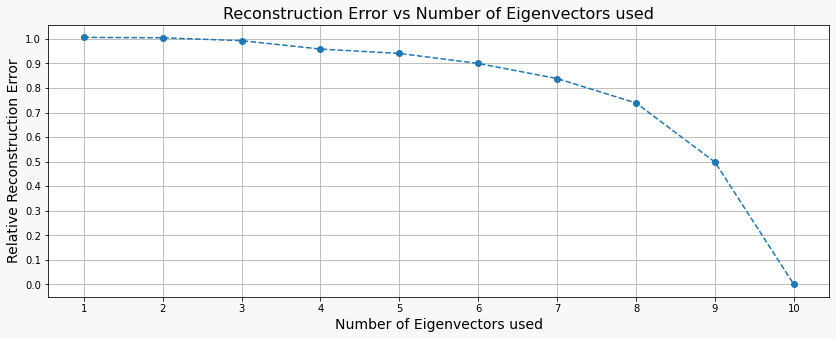

In [11]:
def analyse_reconstruction_error(A, M):
    ''' Uses `get_relative_error` to find relative errors
        given varying number of eigenvalues and plots them.
    '''  

    # Find Error for each varying num of eigenvectors
    errors_list = []
    for n_eigen in range(1,11):
        M = approximate_matrix(e_vals, e_vecs, n_eigen)
        relative_error = get_relative_error(A, M)
        errors_list.append(relative_error)
        print("Num Eigenvectors: {:2d}, Reconstruction Error: {:.5f}"
              .format(n_eigen, relative_error))

    # Plot obtained errors
    plt.figure(figsize=[14,5], facecolor='#F8F8F8')
    plt.title('Reconstruction Error vs Number of Eigenvectors used', size=16)
    plt.xlabel('Number of Eigenvectors used', size=14)
    plt.ylabel('Relative Reconstruction Error', size=14)
    plt.plot(range(1,11), errors_list, '--o')
    plt.xticks(range(1,11))
    plt.yticks(np.arange(0,1.1,0.1))
    plt.grid()
    plt.show()
    
analyse_reconstruction_error(A, M)

# Task 5

In [12]:
def plot_matrices(A, M, figsize=[19,6]):
    ''' Plots the matrices A and M along with D, 
        defined as the asolute difference between them.
    '''
    
    fig = plt.figure(figsize=figsize, facecolor='#F4F4F4')
    
    ax = fig.add_subplot(131)
    cax = ax.matshow(A)
    fig.colorbar(cax, shrink=0.8, aspect=25, ticks=np.arange(-1,1,0.2))
    ax.set_yticks(range(A.shape[0]))
    ax.set_xticks(range(A.shape[1]))
    ax.set_title('Matrix A', size=17)
    
    ax = fig.add_subplot(132)
    cax = ax.matshow(M)
    fig.colorbar(cax, shrink=0.8, aspect=25, ticks=np.arange(-1,1,0.2))
    ax.set_yticks(range(M.shape[0]))
    ax.set_xticks(range(M.shape[1]))
    ax.set_title('Matrix M', size=17)
    
    D = np.abs(A - M)
    ax = fig.add_subplot(133)
    cax = ax.matshow(D)
    fig.colorbar(cax, shrink=0.8, aspect=25,)
    ax.set_yticks(range(D.shape[0]))
    ax.set_xticks(range(D.shape[1]))
    ax.set_title('Matrix D or A - M', size=17)
    
    plt.suptitle('Comparision between Original (A) and Reconstruction (M), with Error (D)', size=20)
    plt.show()
    

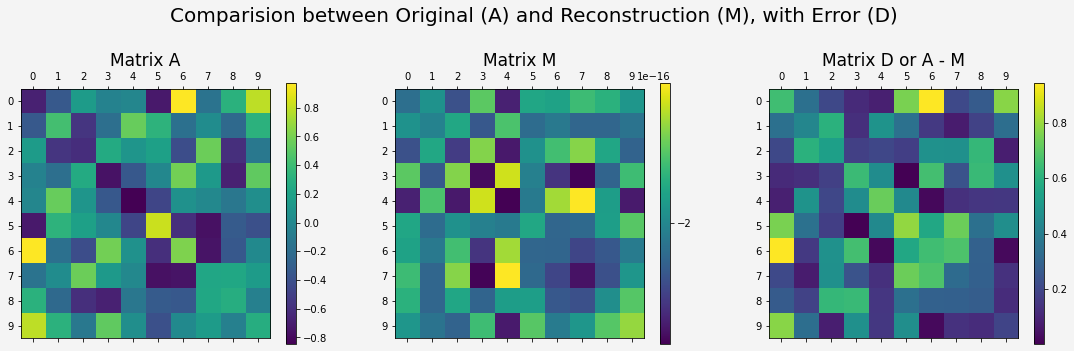

In [13]:
# Get a Symmetric Matrix
A = Get_Symmetric_Matrix(10, low_lim=-1, high_lim=1)

# Calculate and sort the eigenvalues and eigenvectors
e_vals, e_vecs = get_eigen(A)
e_vals = e_vals[::-1]
e_vecs = e_vecs.T[::-1].T

# Approximate A by M
M = approximate_matrix(e_vals, e_vecs, n_eigen=2)

# Plot the graphical Comparision
plot_matrices(A, M, figsize=[19,6])

# Task 6

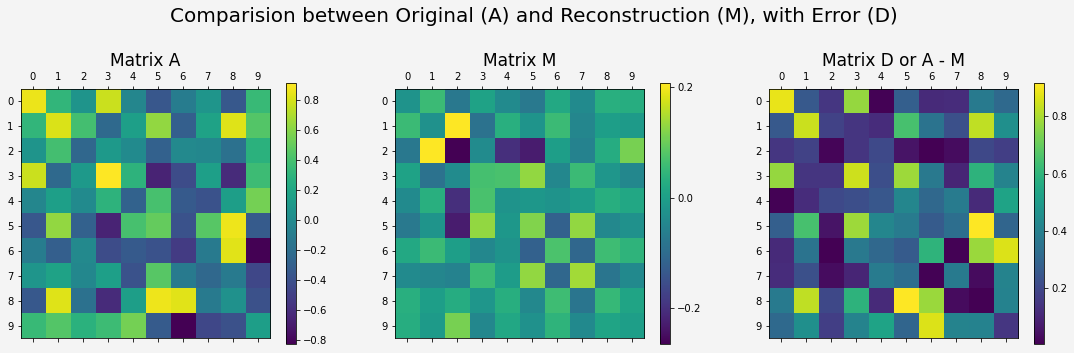

In [14]:
# Get a Symmetric Matrix
A = Get_Symmetric_Matrix(10, low_lim=-1, high_lim=1)

# Calculate and sort the eigenvalues and eigenvectors
e_vals, e_vecs = get_eigen(A)
e_vals = e_vals[::-1]
e_vecs = e_vecs.T[::-1].T

# Approximate A by M
M = approximate_matrix(e_vals, e_vecs, n_eigen=4)   # Similar analysis using 4 Eigenvectors

# Plot the graphical Comparision
plot_matrices(A, M, figsize=[19,6])